In [263]:
from PIL import Image
import PIL
import numpy as np
import functools
import time

In [264]:
img2 = np.array(Image.open('examples/im2.ppm').convert('L'))
img6 = np.array(Image.open('examples/im5.ppm').convert('L'))
disp = np.array(Image.open('examples/disp2.pgm'))/8
maxd = int(disp.max())
img2.shape

(380, 434)

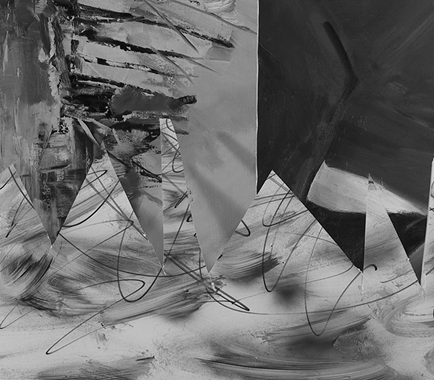

In [265]:
Image.open('examples/im2.ppm').convert('L')

In [266]:
m = img2.shape[1]-1
alpha = 1

In [267]:
def h(r,y,d):
    return abs(img2[r,y] - img6[r,y-d])

In [268]:
def g(d,d1):
    return alpha*abs(d - d1)

In [269]:
G = np.empty((maxd+1,maxd+1))
for i in range(maxd+1):
    for j in range(maxd+1):
        G[i,j]= g(i,j)

In [270]:
vv = []
ad = []
#w = np.full((maxd+1),np.inf).astype('float64')
def recog(array,r,number):
    w =  np.full((maxd+1),np.inf).astype('float64')
    for i in range(0,maxd+1):
        if i < number + 1:
            w[i] = min(array + g(np.array(range(0,maxd+1)),i)) + H[number,i]# да да ми знаэм,що краще матрицю G
    vv.append(np.argmin(w))# G? ага аппенд ми знаєм
    #p = np.array([min(array + g(np.array(range(0,maxd+1)),i)) + H[number,i] for i in range(0,maxd+1) if i < number + 1])
    #w[:number + 1] = p
    #vv.append(np.argmin(array))
    
    return w


In [271]:
a = time.time()

for row in range(img2.shape[0]):
    q =  np.full((maxd+1),np.inf).astype('float64')   
    q[0] = h(row,0,0)
    H = np.array([h(row,i,j) for i in range(m+1)  for j in range(maxd+1)]).reshape((m+1,maxd+1))
    for j in range(1,m+1):
        q = recog(q,row,j)
        
print((time.time()-a)/60,"хв")

C:\Users\Ruslan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


4.267146694660187 хв


In [272]:
dm = np.array(vv).reshape(img2.shape[0],img2.shape[1]-1).astype(np.uint8)*15

In [273]:
new_im = Image.fromarray(dm,mode = 'L')
new_im.save("numpy_altered_sample2.png")

In [192]:
dm[0]

array([ 1,  2,  3,  4,  5,  6,  7,  4,  2,  4,  7,  7,  7,  7,  6,  7,  7,
        7,  6,  6,  6,  6,  7,  5,  4,  5,  5,  5,  6,  3,  3,  3,  6,  7,
        7,  8, 10,  8, 11,  5,  6,  7,  6,  4, 12, 13, 16,  4,  5,  3,  7,
        7, 11, 15,  8,  6,  5,  6,  9,  9,  7,  6, 11, 11, 11, 11,  7,  5,
        7,  6,  5,  6,  7,  7,  6, 11, 15,  6,  5,  6,  7,  9,  9, 10, 10,
       10,  7,  6,  5,  5,  5,  5,  7,  7,  7,  7,  6,  6,  6,  9, 10, 10,
        9,  0,  7,  6,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7, 11,  7,  7,  5,  6,  6,  7,  7,  6,  0,  7,
        4,  5,  7,  6,  7,  9,  7,  6,  8,  0,  6,  6,  6,  5,  6,  4,  6,
        2,  5,  7,  3,  7,  7,  6,  6,  7,  6,  7,  7,  6,  4,  5,  6,  6,
        6,  0,  7,  6,  7,  6,  7,  5,  4,  4,  3,  3,  4,  6,  0, 15, 15,
        6,  6,  6,  6,  7,  6,  5,  7,  8,  5,  6,  6,  6,  6,  6,  6,  6,
        7,  8,  6,  6,  7,  7,  8,  0,  1,  2,  5,  6,  6,  6,  0,  2,  7,
        6,  5, 12, 11,  7

In [232]:
test_ar = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  7,  7,  7,  7,  7,  7,  1,  4,  5,  7,  7,  7,  6,  4,  4,  5,
  6,  7,  7,  7,  7,  7,  7,  3,  3,  6,  7,  7,  8, 10,  8,  7,  5,  7,  7,  7,  6,  9, 10,  5,
  4,  5,  7,  9, 12, 11,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  7,  4,  5,
  7,  7,  5,  6,  8, 15,  6,  6,  6,  7,  9,  9,  8,  7,  6,  7,  6,  6,  7,  7,  7,  7,  7,  7,
  7,  9,  9,  9,  9, 10, 10, 12, 13, 14, 14, 14, 14, 15, 14, 10,  9,  9,  8,  8,  5,  5,  6,  5,
  6,  6,  8,  6,  6,  7,  6,  6,  6,  6,  6,  6,  7,  7,  6,  4,  7,  4,  5,  7,  7,  7,  9,  7,
  6,  3,  6,  6,  6,  7,  7,  6,  6,  6,  2,  3,  7,  6,  7,  1,  6, 11, 12,  6,  6,  6,  7,  6,
  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  4,  3,  5,  6,  6,  6,  7,  6,  2,  6,  6,  6,
  7,  7,  6,  7,  8,  6,  6,  5,  6,  6,  6,  6,  6,  6,  7,  4,  3,  1,  1,  1,  0,  1,  3,  0,
  1,  1,  1,  6,  9,  7,  6,  5,  7,  3,  6,  6,  7,  6,  6,  7,  5,  6,  8,  9,  6,  6,  7,  7,
  7,  7,  7,  7,  7,  7,  7,  6,  4,  4,  4,  4,  5,  5,  6,  6,  6,  6,  8,  6,  3,  3,  2,  2,
  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
  2,  2,  2,  3,  3,  1,  2,  2,  3,  3,  3,  3,  3,  3,  3,  2,  2,  3,  3,  3,  3,  3,  3,  3,
  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  1,  2,  3,  3,
  3,  3,  3,  1,  1,  1,  1,  1,  1,  3,  4,  4,  3,  3,  3,  2,  2,  2,  2,  2,  3,  3,  3,  3,
  4,  4,  4,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,
  3,  3,  5,  5,  5,  5,  5,  5,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,
  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,
  2,  3])

In [238]:
vv[30]

3

In [239]:
test_ar[30]

7